In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [13]:
path = "./data/data.txt"

In [14]:
data_list = []
with open(path,"r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        tmp = line.strip('[]').split()
        data_list.append([float(num) for num in tmp])
data = np.array(data_list)
print(data.shape)

(90, 2)


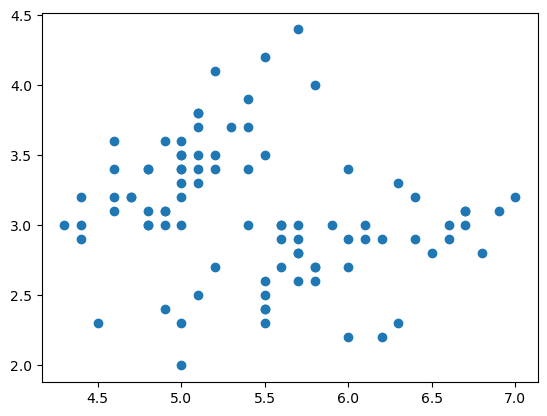

In [15]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [16]:
#计算欧氏距离
def getDistance(x,y):
    return np.sqrt(np.sum((x-y)**2))

#随机中心点
def getCenter(dataset,k):
    m,n = dataset.shape
    centerDots = np.zeros((k,n))
    for i in range(k):
        row = np.random.randint(m)
        centerDots[i,:] = dataset[row,:]
    return centerDots

In [17]:
#Kmeans算法
def Kmeans(dataset,k):
    m,n = dataset.shape
    clusters = np.mat(np.zeros((m,2)))#构造m*2存储分类属性
    centerDots = getCenter(dataset, k)#获取随机中心
    
    Continuing = True
    while(Continuing):
        Continuing = False
        for i in range(m):
            minDistance = 1e5
            minindex = -1
            
            for j in range(k):
                #计算当前记录离那个中心更近
                distance = getDistance(centerDots[j,:], dataset[i,:])
                if distance < minDistance:
                    minDistance = distance
                    minindex = j
            #更新i记录类别
            if clusters[i,0] != minindex:
                Continuing = True
                clusters[i,:] = minindex,minDistance
        #更新中心点
        for j in range(k):
            cur_cluster = dataset[np.nonzero(clusters[:,0].A == j)[0]]
            centerDots[j] = np.mean(cur_cluster,axis=0)
    
    print("聚类完成")
    return centerDots,clusters[:,0].ravel().tolist()

聚类完成


D:\Anaconda\envs\qi\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\qi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


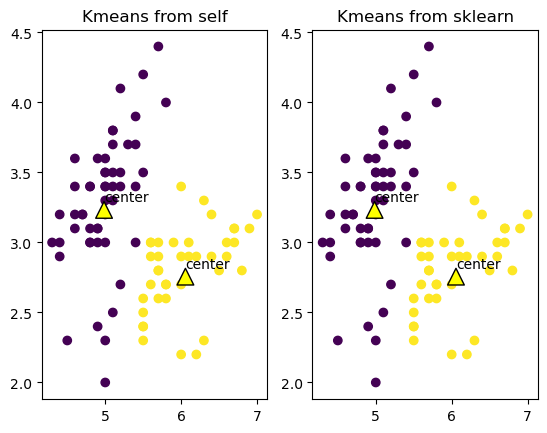

In [22]:
#设置k值
k = 2
plt.figure(dpi=100)
#上述Kmeans实现聚类并可视化
plt.subplot(121)
centroids,labels = Kmeans(data,k)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.title("Kmeans from self")
#绘制中心点
centerDots = centroids
for i in range(len(centerDots)):
    plt.annotate("center", xy=(centerDots[i,0],centerDots[i,1]),arrowprops=dict(facecolor="yellow"))
#使用sklearn库的Kmeans算法进行聚类并可视化
plt.subplot(122)
estimator = KMeans(n_clusters=k).fit(data)
plt.scatter(data[:,0], data[:,1], c=estimator.labels_)
centerDots = estimator.cluster_centers_
for i in range(len(estimator.cluster_centers_)):
    plt.annotate("center", xy=(centerDots[i,0],centerDots[i,1]),arrowprops=dict(facecolor="yellow"))
plt.title("Kmeans from sklearn")
plt.show()

In [ ]:
print(centroids[1:0])